# Data Mining Lab 4 - Clustering 
### Lavinia Pulcinella 

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings
warnings.filterwarnings("ignore")

###### <font color=red> Note: Many outputs are rather long. So in order to respect the 15 pages limit, many of them will not show in the final pdf file. Only the code will be shown  </font>

# Assigment 1

##### (a) Generate 4 Gaussian clusters.

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) #default range is alread [-10,+10]
X = X[:, ::-1] # flip axes for better plotting

##### (b)  Run k-means and visualize the clusters and their centers for k in {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}. Set parameter random_state to None.



In [3]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix


def plot_clusters(data,k):
    for k in range(1,k): 
        plt.figure()
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit(data).predict(data)
        plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis'); 
        plt.title('K means with k=%i' %k)
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

def conting_matrix(k, data): 
    cont_matrix = []
    for k in range(1,11): 
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit(data).predict(data)
        cont_matrix = contingency_matrix(labels_true=y_true, labels_pred = labels)
        print('Contingency matrix for K = {}:'.format(k))
        print(cont_matrix)

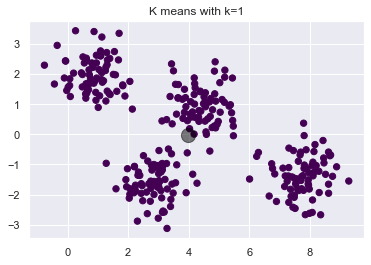

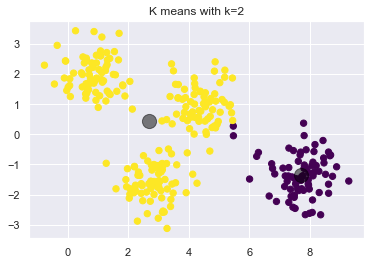

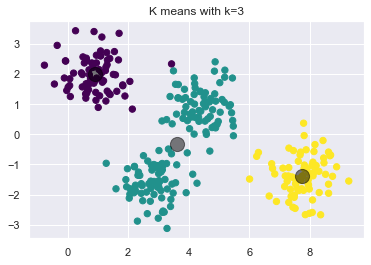

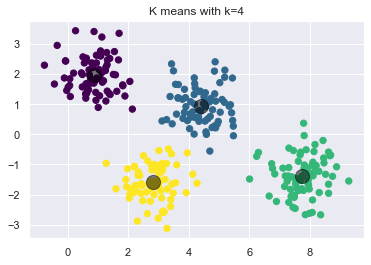

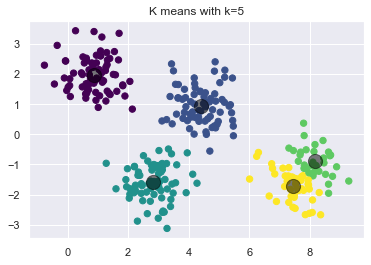

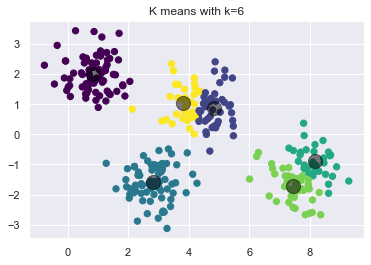

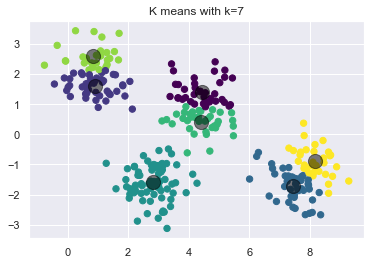

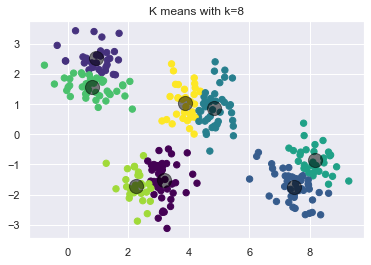

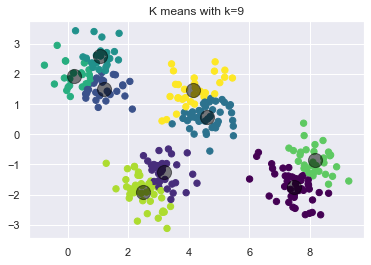

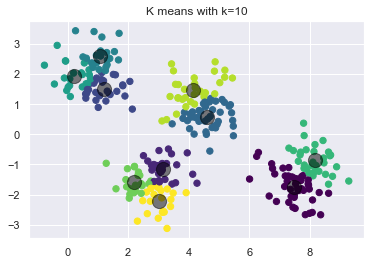

In [4]:
plot_clusters(X,11)

###### Print the contingency tables of the clustering solutions.

In [5]:
conting_matrix(11, X)

Contingency matrix for K = 1:
[[75]
 [75]
 [75]
 [75]]
Contingency matrix for K = 2:
[[ 2 73]
 [ 0 75]
 [ 0 75]
 [75  0]]
Contingency matrix for K = 3:
[[ 1 74  0]
 [75  0  0]
 [ 0 75  0]
 [ 0  0 75]]
Contingency matrix for K = 4:
[[ 0 75  0  0]
 [75  0  0  0]
 [ 0  0  0 75]
 [ 0  0 75  0]]
Contingency matrix for K = 5:
[[ 0 75  0  0  0]
 [75  0  0  0  0]
 [ 0  0 75  0  0]
 [ 0  0  0 32 43]]
Contingency matrix for K = 6:
[[ 0 42  0  0  0 33]
 [74  0  0  0  0  1]
 [ 0  0 75  0  0  0]
 [ 0  0  0 32 43  0]]
Contingency matrix for K = 7:
[[39  0  0  0 36  0  0]
 [ 0 46  0  0  0 29  0]
 [ 0  0  0 74  1  0  0]
 [ 0  0 43  0  0  0 32]]
Contingency matrix for K = 8:
[[ 0  0  0 42  0  0  0 33]
 [ 0 32  0  0  0 43  0  0]
 [47  0  0  0  0  0 28  0]
 [ 0  0 44  0 31  0  0  0]]
Contingency matrix for K = 9:
[[ 0  0  0 44  0  0  0  0 31]
 [ 0  0 29  0 24 22  0  0  0]
 [ 0 36  0  0  0  0  0 39  0]
 [44  0  0  0  0  0 31  0  0]]
Contingency matrix for K = 10:
[[ 0  0  0 44  0  0  0  0 31  0]
 [ 0  0 2

The contingency tables, whose rows represent the true cluster and columns the predicted cluster, show how for k = 1 we can see that obviously all observations are grouped ina single cluster. More in depth, for k > 5, we see how the natural clusters are further divided into more clusters. This shows a limitation of K-means, namely it requires as an initialization parameter the number of centroids from which to start from which we almost never know in advance. Thus, for k different than 4 the algorithm seems to work poorly. 

###### (c) Plot the sum of square error (SSE) for k in {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}. Does the plot indicate that the natural number of clusters is 4?


The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge. 

The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

In [6]:
def elbow_sse_plot(X, k): 
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()


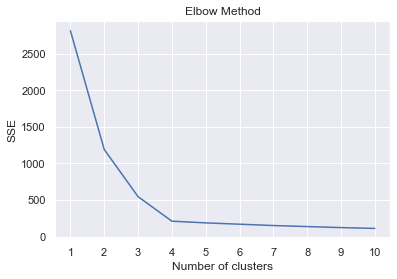

In [7]:
elbow_sse_plot(X, 11)

**Answer:** Using the elbow method we see that indeed the number of natural clusters is 4. That is we see that for number of clusters = 4 the plot clearly "bends changing direction". The point to which the line "bends" corresoponds to the ideal number of clusters to use. 

##### (d) Repeat (a)-(c)  with the standard deviation of 0.1 and 2.5. Do the SSE plots indicate that the natural number of clusters is 4?


In [8]:
X1, y_true1 = make_blobs(n_samples=300, centers=4, cluster_std=0.1, random_state=0) #default range is alread [-10,+10]
X1 = X1[:, ::-1] # flip axes for better plotting

X2, y_true2 = make_blobs(n_samples=300, centers=4, cluster_std=2.5, random_state=0) #default range is alread [-10,+10]
X2 = X2[:, ::-1] # flip axes for better plotting

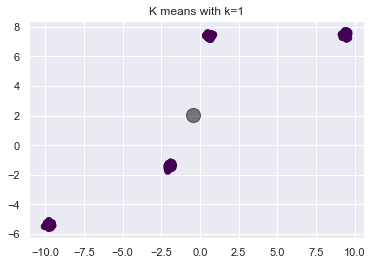

In [32]:
# plot_clusters(X1, 11) ##output too long to respect the 15 pages limit
plot_clusters(X1, 2) #only to show how the data is scattered across the plane
#plt.suptitle('sd=0.1')

In [10]:
#conting_matrix(11, X1) #output too long to respect the 15 pages limit

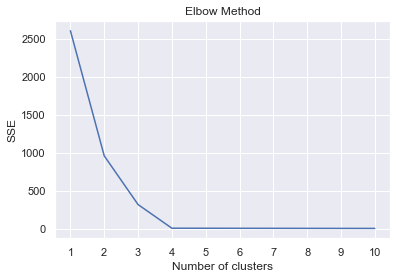

In [11]:
elbow_sse_plot(X1,11)
#plt.suptitle('sd=0.1')

###### Standard deviation = 2.5

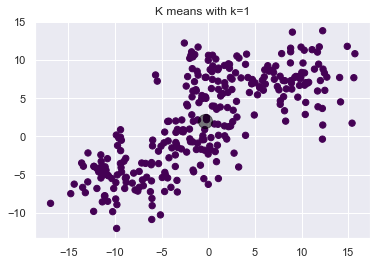

In [31]:
#plot_clusters(X2, 11) #output too long to respect the 15 pages limit
plot_clusters(X2, 2) #only to show how the data is scattered across the plane

In [13]:
#conting_matrix(11, X2) #output too long to respect the 15 pages limit

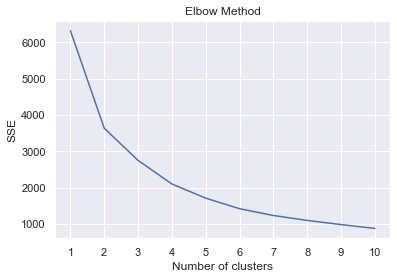

In [14]:
elbow_sse_plot(X2,11)

**Answer:**

For sd = 0.1 the SSE plot still clearly indicates that the natural number of clusters is 4. 

For sd = 2.5 however, the points are scattered around the plane without any clear distiction. In a way it can be cosidered that all the observations could be grouped in only one cluster as k means "doesn't know" how the clusters have been generated by make_blobs. This is due to the fact that, by increasing the standard deviation, and thus by increasing the range of the points generated around the initial ones there is no clear distincion of the generated clusters. 



###### (e)  Repeat (d) with another cluster-center initialization by setting the parameter random_state of KMeans to an integer number. 
###### When do (not) you receive clustering solutions similar to those obtained for random_state=None? Can you explain why? 
###### Can you propose an extension of the k-means initialization that results in similar clustering solutions?

In [15]:
X1, y_true1 = make_blobs(n_samples=300, centers=4, cluster_std=0.1, random_state= 8) #default range is alread [-10,+10]
X1 = X1[:, ::-1] # flip axes for better plotting

X2, y_true2 = make_blobs(n_samples=300, centers=4, cluster_std=2.5, random_state=8) #default range is alread [-10,+10]
X2 = X2[:, ::-1] # flip axes for better plotting

In [16]:
#plot_clusters(X1, 11)
#plt.suptitle('sd=0.1')

In [17]:
#conting_matrix(11, X1)

In [18]:
#plot_clusters(X2, 11)

In [19]:
#conting_matrix(11, X2)

**Answer:**

In general, the random_state option allows to have reproducible results (useful for debugging). 

- For random_state= none , a global random number generator is used (usually relies on PC date) which leads to results are not reproducible. By setting it as an integer number, a specific random number generator is used which allows for replication of results. 
- In general, k means is not a deterministic algorithm as it begins with a randomised initialization (the centroids). This randomness implies that for different runs the algorithms begins at different points (i.e. centroids). Thus, fixing the pseudo number generator allows for the randomness to “always be the same”. Also, k - means may get stuck in a local minima thus the dependence on inizialization of the centroids. 


**What can we do?**


1. May be useful to find a good minimum is to run the algortihm several times with several initializations and keep the best result. i.e. Good practice is to rerun multiple times with multiple initializations and take the best. 

 In some clustering senses, it can be argued that initialization can have more impact than model choices (to some degree, with bias). Changing the initialization from 'random points' (the default centroid selection) to maximin or random partition based initialisations. 
 

2. Maxmin is based on distance optimisation which could help with cluster separation. Random partition works similarly to random points but instead we initialize the labels by randomly assigning each data point to a cluster. Whereas random points would initialize centroids by selecting K data points uniformly 


# Assigment 2

###### (a) Load and print the vertebrate.csv data.


In [20]:
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize

In [21]:
data = pd.read_csv('vertebrate.csv')
data.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


Create dummy variables for 'Name' column. 

In [22]:
data_dummy = pd.get_dummies(data, columns=['Name'])
data_dummy["Class"] = data_dummy["Class"].astype('category')
data_dummy["Class"] = data_dummy["Class"].cat.codes

cols = list(data_dummy.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Class')) #Remove b from list
data_dummy = data_dummy[cols+['Class']]

###### (b) Run single-link, max-link and average-link hierarchical clustering on this data. Visualize the hierarchies. Indicate the hierarchy that in your view is most natural given the data.
###### Hint: To run hierarchical clustering use function hierarchy.linkage from scipy.cluster.  To visualize hierarchy.dendrogram from scipy.cluster.

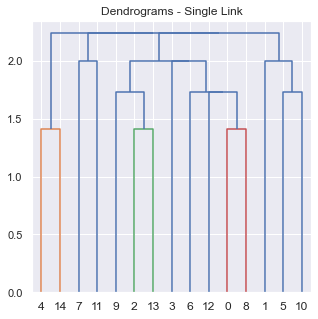

In [23]:
plt.figure(figsize=(5, 5))  
plt.title("Dendrograms - Single Link")  
dend = shc.dendrogram(shc.single(data_dummy))

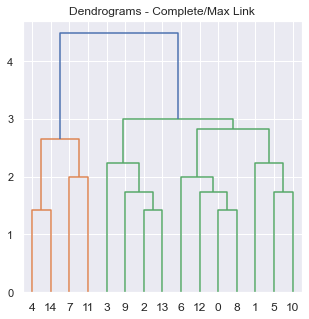

In [24]:
plt.figure(figsize=(5,5))  
plt.title("Dendrograms - Complete/Max Link")  
dend = shc.dendrogram(shc.complete(data_dummy))

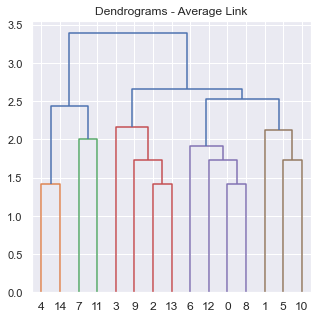

In [25]:
plt.figure(figsize=(5,5))  
plt.title("Dendrograms - Average Link")  
dend = shc.dendrogram(shc.average(data_dummy))

###### <font color=red> Comment: Indicate the hierarchy that in your view is most natural given the data. </font>

From the data at hand we know that our data needs to be grouped into 5 main clusters. 
In general, the y-axis measures the closeness between the clusters and if we "draw" a horizontal line at any y value we get an idea of how many clusters we have until that point.  
- The single link Dendogram shows how the method is not even able to detect the 5 classes. Thus, we discard it as a good approach in this case. 
- In the Max/Complete linkage dendogram for y around 2.5 we get already 5 classes which are then merged toghether. 
- in the Average linkage dendogram for an even lower y we get the 5 classes (which are again merged together as the diagram grows). 

Thus, it looks like using average link and then max link would be the better choice. 





# Assigment 3

###### (a) Load and visualize the chameleon.csv data.


In [26]:
data = pd.read_csv('chameleon.csv')
data.head()
X = data['x'].values
Y = data['y'].values
X = X.reshape(-1,1)

Text(0.5, 1.0, 'Chameleon Data Plot')

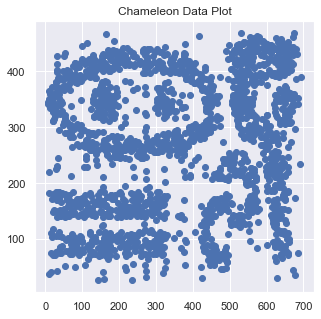

In [27]:
plt.figure(figsize=(5,5))
plt.plot()
plt.scatter(X, Y)
plt.title('Chameleon Data Plot')

###### (b) Run the DBSCAN method on this data for eps=15.5 and min_samples=5. Vizualize the clustering solutions.
###### Hint: To run the DBSCAN method hierarchical clustering use function DBSCAN from sklearn.cluster.


DBSCAN is a density-based clustering method. It identifies the individual clusters as high-density regions that are separated by regions of low density. Specifically, in DBScan, data points are classified into either core points, border points, or noise points based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters: radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples).

We apply the DBSCAN algorithm on the data by setting eps = 15.5 and min_samples = 5. 

In [28]:
from sklearn.cluster import DBSCAN

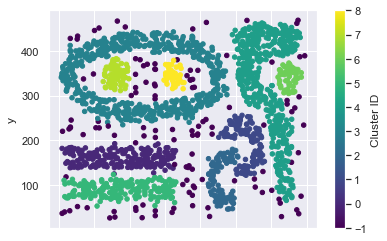

In [29]:
db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='viridis')

###### (c) Experiment with the sensitivity of the DBSCAN method for eps in [0.1, 20] with step of 0.5 and min_samples in [1, 20] with step of 2.

In [30]:
eps =  np.sort(np.append(np.arange(0.1, 20, 0.5), (15.5, 20), axis=None))
min_samp = np.arange(1, 20, 2)

#X = StandardScaler().fit_transform(chameleon)
for i, j in enumerate(min_samp):
    for m,n in enumerate(eps):
    
        db = DBSCAN(eps=n, min_samples=j).fit(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        y_pred = DBSCAN(eps=n, min_samples=j).fit_predict(data)
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        #plt.figure()
        #plt.scatter(chameleon['x'] ,chameleon['y'], c=y_pred, s=50, cmap='viridis', alpha=0.5)
        #print("______________________________________________")
        #print("min_samples: ", j)
        #print("eps:", n)
        #print('Estimated number of clusters: ', n_clusters_)
        #print('Estimated number of noise points: ', n_noise_)
        #print("")
